In [5]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
sys.path.insert(0, os.path.abspath('../'))

%config InlineBackend.figure_format = 'retina'

from src.sdge.data import *

# Load 2019 - 2020 data

In [2]:
year = ["2019","2020"] 
quarter = ["Q1","Q2","Q3","Q4"]
path = "../data/sdge/"

avgkwh_year = {} #dictionary containing avgkwh per month per customer type from 2019 to 2020
for y in year:
    avgkwh = {}
    for q in quarter:
        if not (y == "2020" and q == "Q4"):
            data = read_sdge_data(path,y,q,"ELEC")
            avgkwh.update(get_avgkwh_per_customer_month(data))
    avgkwh_year[y] = avgkwh
    

# Plot the difference between 2019-2020 per customer type

Ttest_indResult(statistic=2.3779857908437414, pvalue=0.03021277555079446)
Ttest_indResult(statistic=1.3447154722286725, pvalue=0.19747109099555998)
Ttest_indResult(statistic=-0.9296175963815667, pvalue=0.3663831476079482)


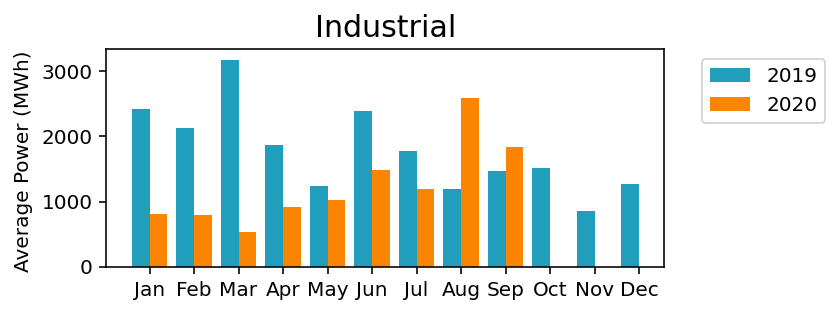

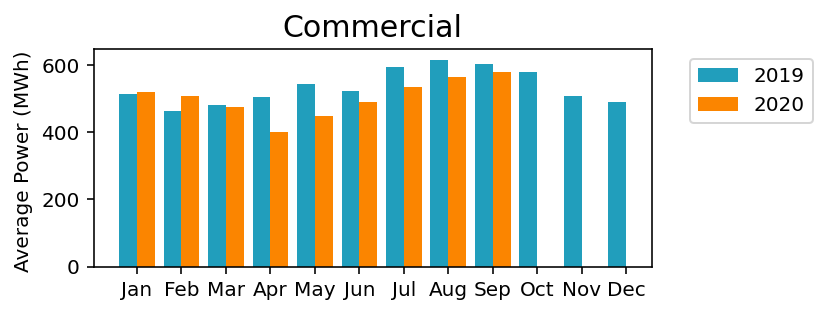

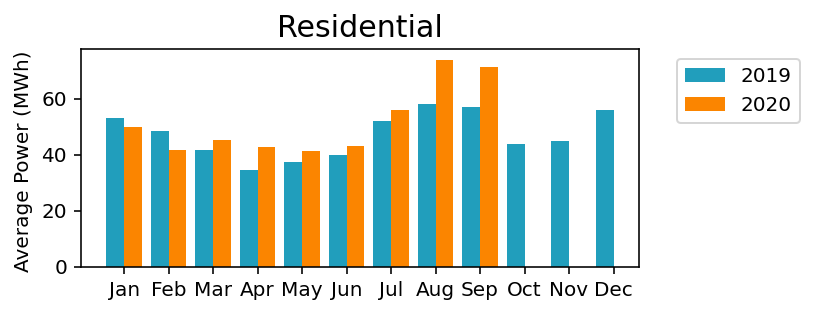

In [7]:
customer = {'I':'Industrial','C':'Commercial','R':'Residential'}
month = np.arange(1,13)

k=0
for c in customer:
    d_19 = []
    d_20 = []
    for m in month:
        d_19.extend([avgkwh_year["2019"][str(m)+c]])
        if str(m)+c in avgkwh_year["2020"]:
            d_20.extend([avgkwh_year["2020"][str(m)+c] ])
    
    #plot
    k+=1
    plt.figure(figsize=(5,2))

    x = np.arange(12)
    d_191 = [i/1e3 for i in d_19]
    plt.bar(x-0.4,d_191,width=0.4,align='edge',color="#219EBC")
    x = np.arange(9)
    d_201 = [i/1e3 for i in d_20]
    plt.bar(x,d_201,width=0.4,align='edge',color="#FB8500")
    plt.xticks(np.arange(12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    plt.title(customer[c],fontsize=15)
    plt.ylabel("Average Power (MWh) ",fontsize=10)
    
    plt.savefig(c+".png")
    plt.legend(['2019','2020'],bbox_to_anchor=(1.05, 1), loc='upper left')
    
#     print(ttest_ind (d_19[:9],d_20))
    